In [1]:
import os, glob, platform
import numpy as np
import numpy.matlib
import pickle
import pandas as pd
import pathlib
import matplotlib
import matplotlib.pyplot as plt

import mne
mne.__version__


'1.4.0'

In [2]:
subjs_list = ['s01'
              , 's02'
              , 's03'
              ,'s04','s05','s07','s08','s09','s10','s11','s12','s13','s14', 's15', 's16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27' 
              ]

In [3]:
path = 'Cond_CJ_EEG'

In [4]:
epochs = []
for isubj, subject_id in enumerate(subjs_list):
    preproc_path = os.path.join(path, subject_id);
    epoch = mne.read_epochs(preproc_path + '/main_epo.fif',verbose=False)
    epochs.append(epoch.average());
    print(isubj)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
0
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
1
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
2
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
3
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
4
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
5
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
6
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
7
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
8
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
9
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
10
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
11
NOTE: pick_cha

In [5]:
# epoch.average()

In [6]:
gvaverage = mne.grand_average(epochs[:])

Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pi

In [7]:
type(gvaverage)
'''
Evoked is basically the same as the epocs data but averaged(?)
'''

'\nEvoked is basically the same as the epocs data but averaged(?)\n'

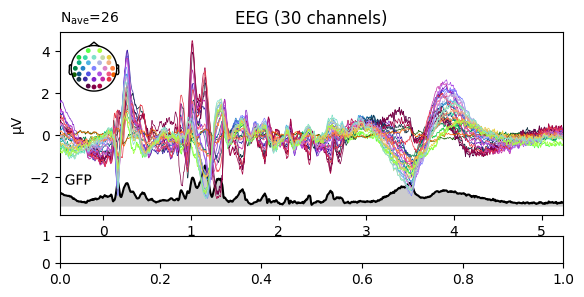

In [8]:
# figsize unit is inches
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 3.),
                         gridspec_kw=dict(height_ratios=[5, 0.75]))

# we'll put the evoked plot in the upper axes, and the brain below
evoked_idx = 0
brain_idx = 1

# plot the evoked in the desired subplot, and add a line at peak activation
gvaverage.plot(axes=axes[evoked_idx], spatial_colors=True,  gfp=True) #  spatial_colors=True, gfp=True
axes[evoked_idx].axvline(0, color='#66CCEE', ls='--')
axes[evoked_idx].axvline(0.75+(0.25*7), color='red', ls='--')
axes[evoked_idx].axvline(0.75, color='red', ls='--')
for istim in range(6):
    axes[evoked_idx].axvline(0.75+0.25*(istim+1), color='green', ls='--')



In [9]:
all_epochs = []
all_rawdata = [None] * np.size(subjs_list)
for isubj, subject_id in enumerate(subjs_list):
    preproc_path = os.path.join(path, subject_id);
    epoch = mne.read_epochs(preproc_path + '/main_epo.fif',verbose=False)
    subj_data = {'epoch_dat' : epoch.get_data(), 'metadata' :  epoch.metadata}
    all_rawdata[isubj] =  subj_data
    all_epochs.append(epoch);
    epoch.metadata

In [10]:
nreps = [0, 1, 2];
all_evoks = []

for irep in nreps:
    nreplist = []
    for isubj, subject_id in enumerate(subjs_list):
        epoch = all_epochs[isubj]
        mdata = epoch.metadata.copy()
        mdata.reset_index(inplace = True)
        sel_epos = mdata[mdata.nrep == irep].index;  
        nreplist.append(epoch[sel_epos].average());
        #all_evoks[irep] = epoch[sel_epos].average();
    all_evoks.append(nreplist)      
        

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [11]:
nreps = [0, 1, 2];
rep_gvaverage = [None] * 3
for irep in nreps:
   rep_gvaverage[irep] = mne.grand_average(all_evoks[irep])
    

Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pi

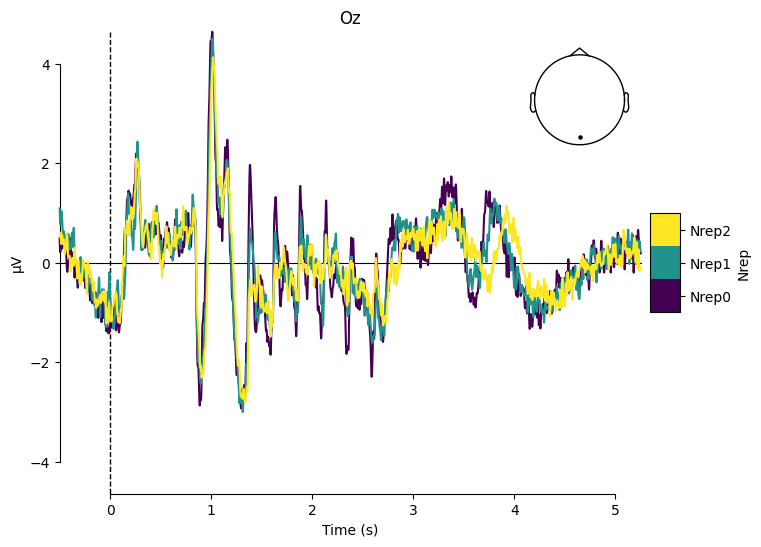

[<Figure size 800x600 with 3 Axes>]

In [12]:
mne.viz.plot_compare_evokeds(dict(Nrep0=rep_gvaverage[0], Nrep1=rep_gvaverage[1],Nrep2=rep_gvaverage[2]), picks = ['Oz'], cmap=('Nrep', 'viridis'))


In [13]:
all_rawdata

[{'epoch_dat': array([[[-3.23375903e-06, -3.39563272e-06, -3.27639832e-06, ...,
           -5.21956107e-06, -6.31544108e-06, -6.69954908e-06],
          [-4.18014139e-06, -4.11404623e-06, -3.79929812e-06, ...,
           -1.24822620e-06, -4.05309999e-07,  1.77226118e-07],
          [-5.28073368e-06, -6.15140389e-06, -6.04043680e-06, ...,
           -4.85000171e-06, -7.06356451e-06, -8.74862539e-06],
          ...,
          [-2.71091034e-06, -3.28615356e-06, -3.88736486e-06, ...,
           -3.63481018e-06, -5.15470027e-06, -6.44033653e-06],
          [-2.59290086e-06, -2.89545555e-06, -2.98459386e-06, ...,
           -3.85033314e-06, -5.06823715e-06, -5.84343370e-06],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
  
         [[-7.61577053e-08, -6.68683434e-07, -1.40924851e-06, ...,
            3.06527659e-06,  2.51745845e-06,  2.13269617e-06],
          [ 2.48171713e-06,  2.76323339e-06,  2.75248207e-

In [14]:
# Scorer: non parametric R²
from sklearn.metrics import roc_auc_score

def prob_scorer(y_true, y_pred):
    """Score probabilistic outputs for a single class as the other class is the numerical complement."""
    return roc_auc_score(y_true, y_pred)

In [15]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

# from decoding_toolbox_py.Helper_funcs import DecToolbox as dt
# from decoding_toolbox_py.Helper_funcs.base_stats import corr_linear_circular
# from decoding_toolbox_py.Helper_funcs.classifier_funcs import scorer_angle, AngularRegression

import DecToolbox as dt
from base_stats import corr_linear_circular
from classifier_funcs import scorer_angle, AngularClassifier



# import DecToolbox as dt # pip install dectool 

from mne import read_epochs
from mne.decoding import SlidingEstimator,GeneralizingEstimator

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVR, SVC
# from base_stats import corr_linear_circular
from sklearn import preprocessing
# from classifier_funcs import AngularRegression, scorer_angle
from sklearn.preprocessing import StandardScaler
import time as tm


from sklearn.model_selection import KFold


time = gvaverage.times
n_time = len(time)
#%%capture --no-display
clf = SVC(kernel='linear')
clf = SVC(kernel='linear', probability=True)
a = tm.time() 
nfold = 5 # folds for crossvalidations
n_time = len(time)
nSubj = np.size(subjs_list)
scorer_deci_subjs = np.zeros((nSubj,n_time))
scorer_deci_fold_subjs = np.zeros((nfold,n_time))
lab = preprocessing.LabelEncoder()

for ival, isubj in enumerate(subjs_list):
    print(ival)
    Y = all_rawdata[ival]['epoch_dat'] 
    all_rawdata[ival]['metadata']['condv'] = 'C'
    all_rawdata[ival]['metadata'].loc[all_rawdata[ival]['metadata']['cond']== 1, 'condv'] =  'D'
    dv  = np.array(all_rawdata[ival]['metadata'].condv)
    dv = lab.fit_transform(dv)
    
    #dv = lab.fit_transform(dv)
   # binned_dv = np.digitize(dv, bins = np.array([ -0.3,0,0.3 ]) ) # bins collapsing degrees by similarity

    FoldsIdx = dt.CreateFolds(dv, Y, nfold)
    
    for ifold, fold in enumerate(FoldsIdx):
        train_ix = fold['train_index']
        test_ix = fold['test_index']
        print('hi')
        for it in range(len(time)):
            
            Ytime = Y[:,:,it]
            scaler = StandardScaler().fit(Ytime)
            Ytime = scaler.transform(Ytime)
            
            clf.fit( Ytime[train_ix,:], dv[train_ix])
            preds = clf.predict(X = Ytime[test_ix])
            scorer_deci_fold_subjs[ifold, it] = prob_scorer(dv[test_ix],preds)
            
    scorer_deci_subjs[ival, : ] = np.mean(scorer_deci_fold_subjs, axis = 0)
b = tm.time()                          

0
hi
hi
hi
hi
hi
1
hi
hi
hi
hi
hi
2
hi
hi
hi
hi
hi
3
hi
hi
hi
hi


In [ ]:
!pip install nose

In [ ]:
19 - 3.6
25 - 5.1